In [84]:

###########
from DOCKS import DOCKs
######
import pandas as pd
import numpy as np
import random
import tqdm
import datetime
################################Dataviz
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
df_Station_final = pd.read_csv('Divvy_stations_community.csv',index_col=0)

In [2]:
Final_Capacity_df= pd.read_csv('Nbh_Capacity.csv')

In [14]:
Final_Capacity_df['wkday'] = Final_Capacity_df.date.apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d').weekday())

In [124]:
def Capacity_Viz(tp):
    df_subset = Final_Capacity_df.groupby('wkday').mean()
    df_capacity_ready = df_subset[[i for i in df_subset.columns if tp in i ]].rename(
        columns= {i:i.split('_')[0] for i in df_subset.columns if tp in i})
    df_capacity_ready = df_capacity_ready.T.rename(columns={i:f'CD_{tp}_wkd_{i}' for i in range(7)}).reset_index().rename(columns={'index':'Nbh_id'})
    df_capacity_ready.Nbh_id = [float(Nbh_id) for Nbh_id in list(df_capacity_ready.Nbh_id)]
    #####
    Data = df_Station_final.merge(df_capacity_ready,left_on='Nbh_id',right_on='Nbh_id')
    for wkd in tqdm.trange(7):
        a = Data[f'CD_{tp}_wkd_{wkd}']
        bins = [a.min()-0.001]
        for pct in [25,50,75]:
            p = np.percentile(a, pct) # return 50th percentile, e.g median.
            bins.append(p)
        bins.append(a.max()+0.001)
        Data[f'daily_capacity_group_{tp}_wkd{wkd}'] = pd.cut(   
            x=Data[f'CD_{tp}_wkd_{wkd}'],bins=bins)

        LABs = [str(i) for i in sorted(Data[f'daily_capacity_group_{tp}_wkd{wkd}'].unique())]
        Data[f'daily_capacity_group_{tp}_wkd{wkd}_str'] = [str(i) for i in Data[f'daily_capacity_group_{tp}_wkd{wkd}']]
        ###
        figsize=(24,10)
        palette = 'coolwarm'

        plt.figure(figsize=figsize)
        title = f'Station sample avg {tp} capacity on {wkd}'
        plt.title(title)
        sns.scatterplot(data=Data , x='lng',y='lat',hue=f'daily_capacity_group_{tp}_wkd{wkd}',
                            palette = palette)

        #plt.show()
        plt.savefig(title+'.png',format='png',dpi=600)

100%|██████████| 7/7 [00:33<00:00,  4.79s/it]


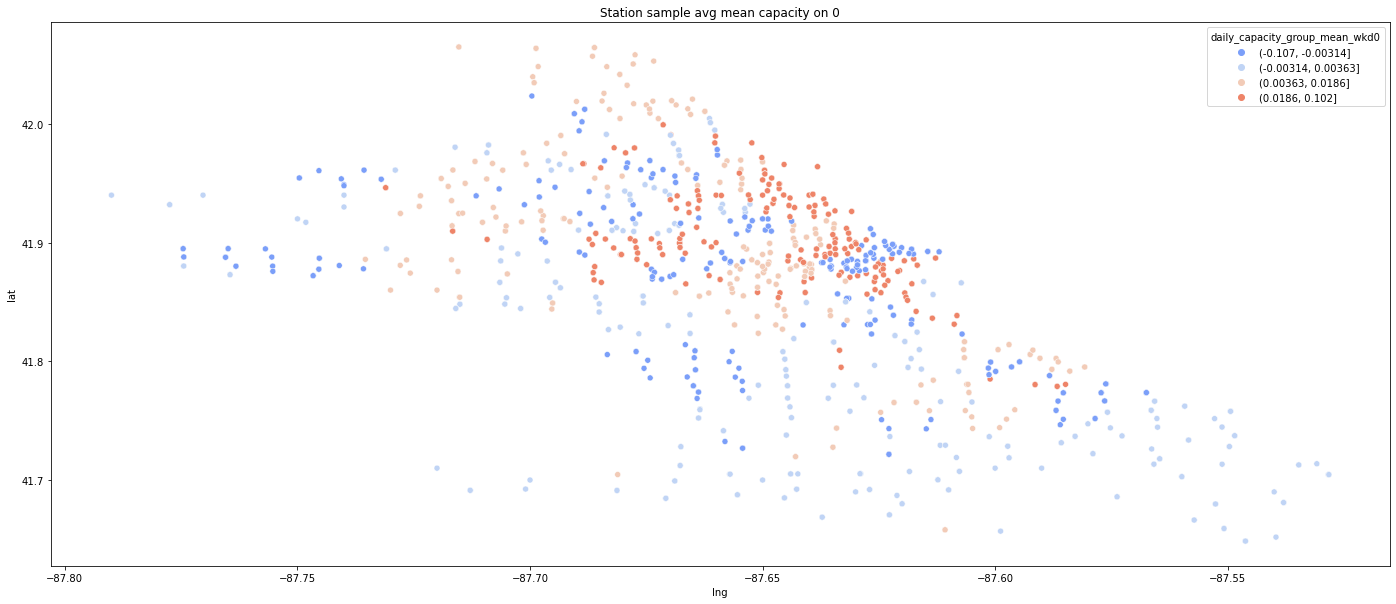

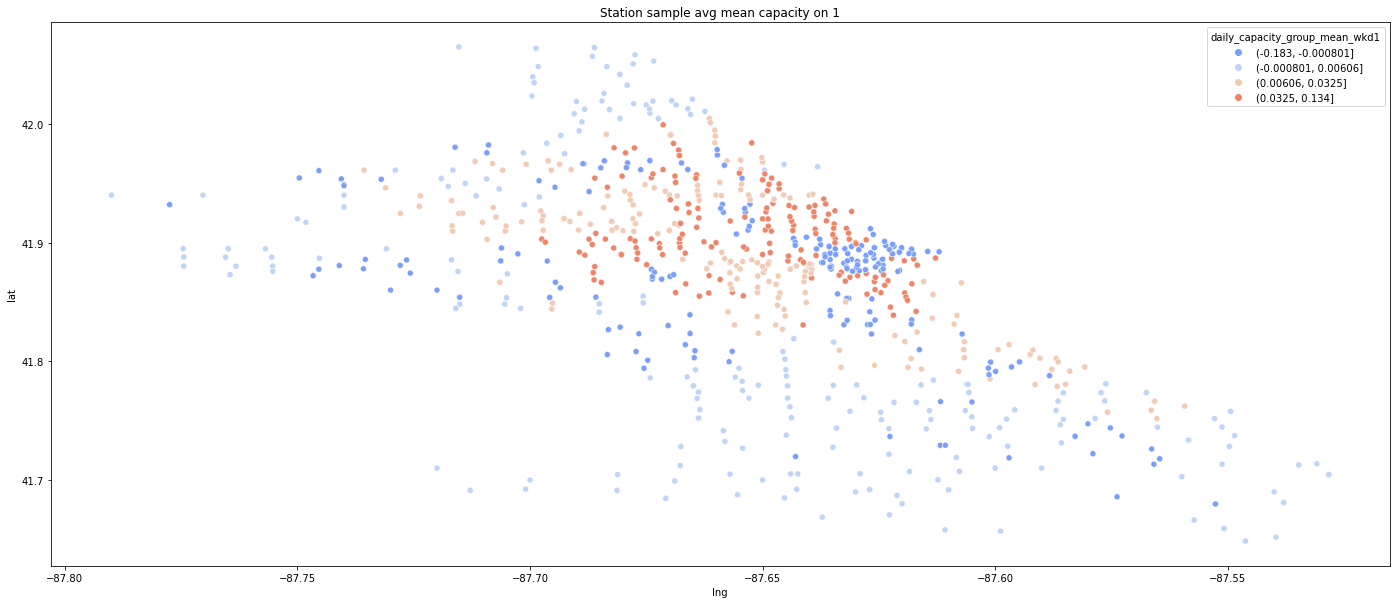

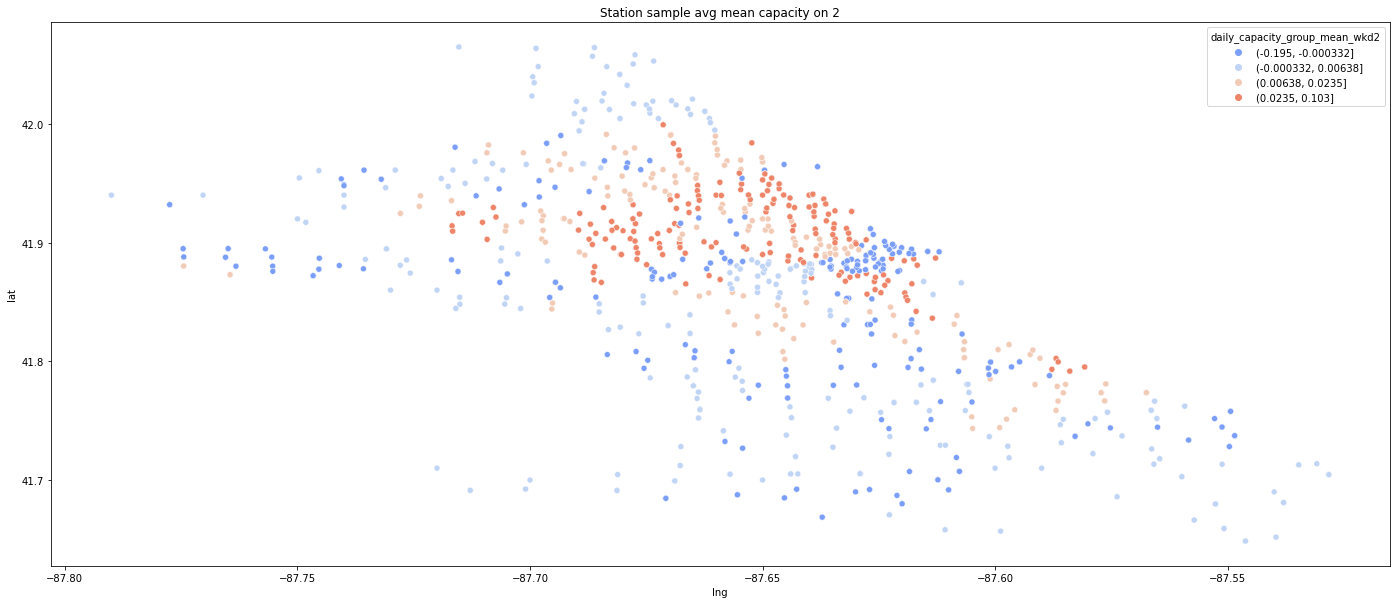

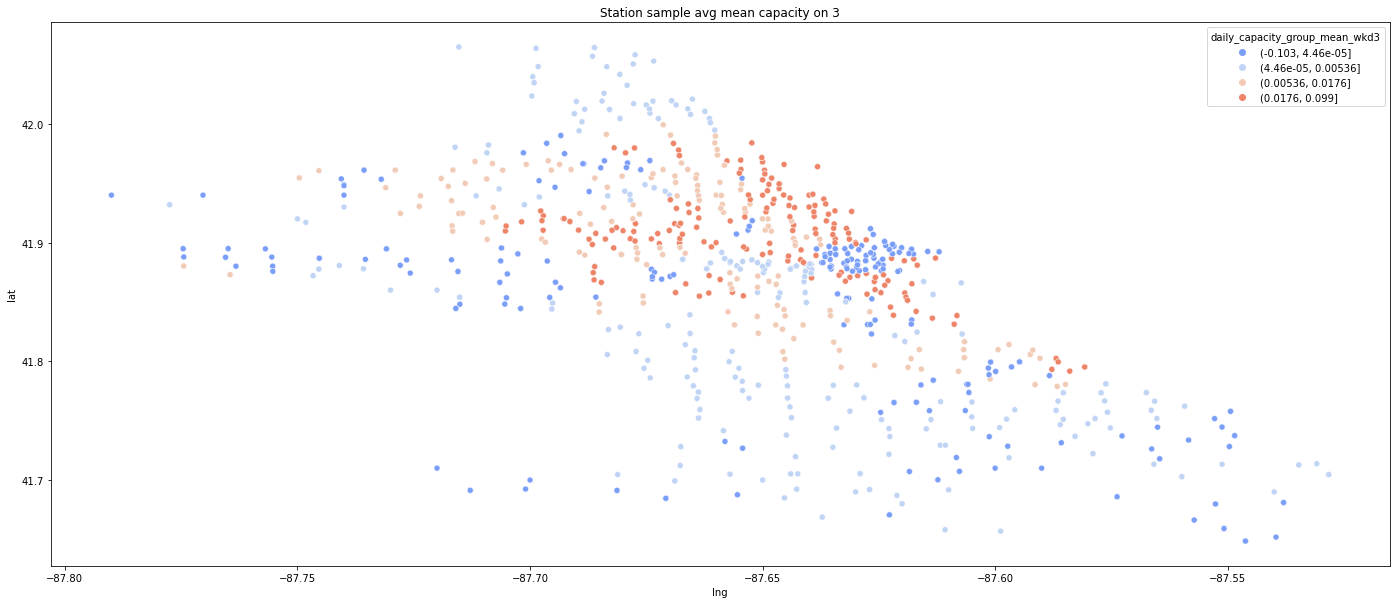

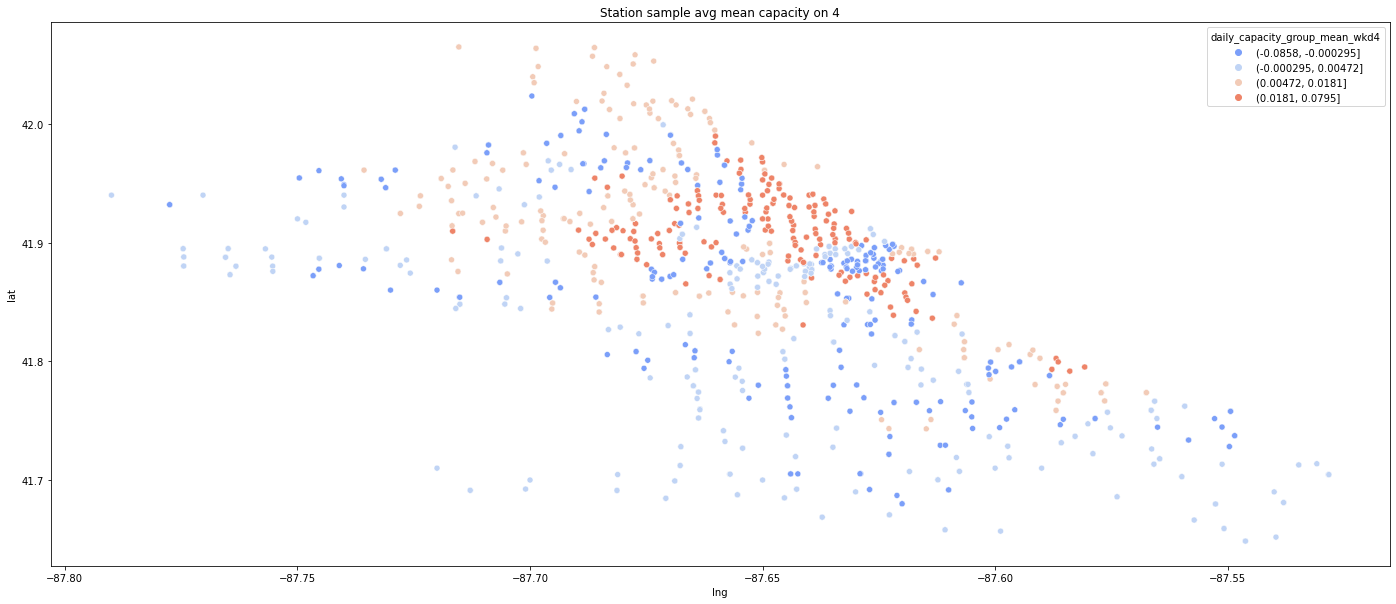

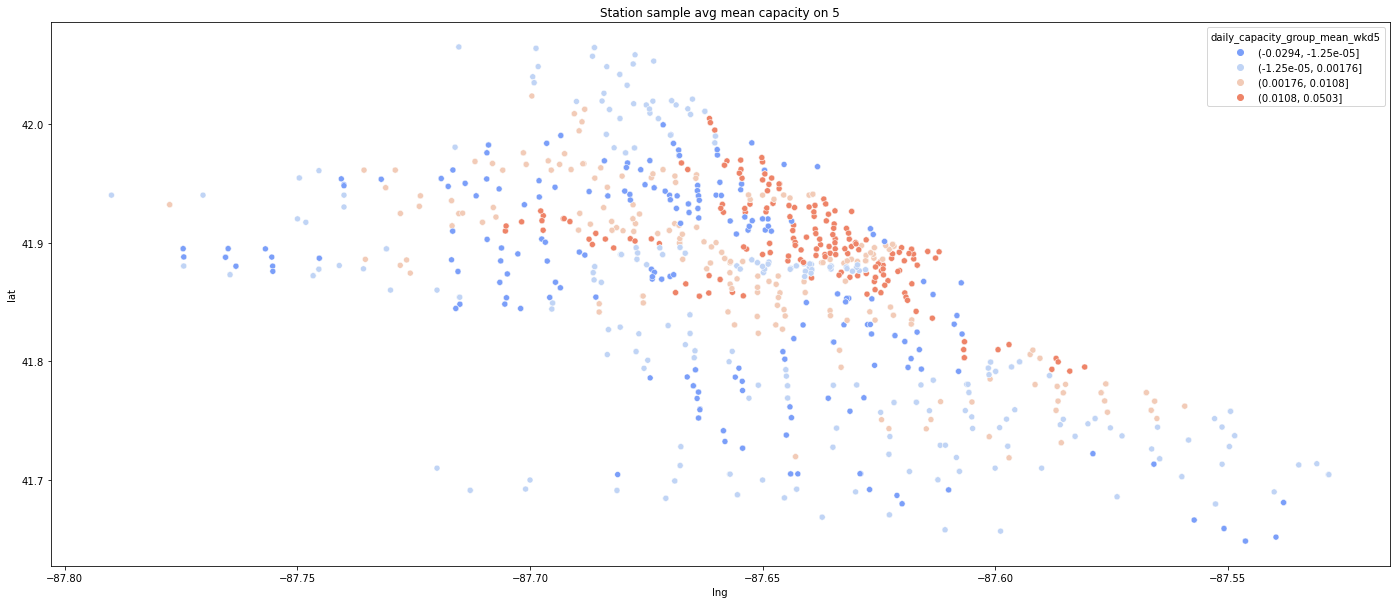

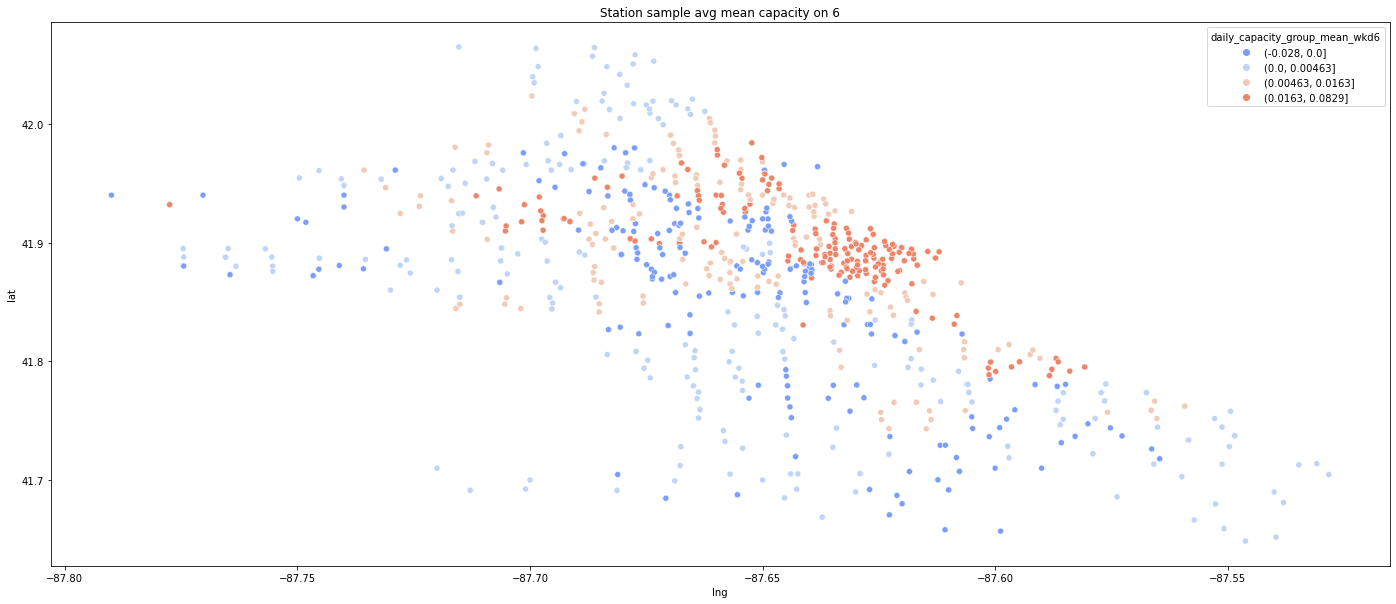

In [125]:
Capacity_Viz('mean')

100%|██████████| 7/7 [00:33<00:00,  4.82s/it]


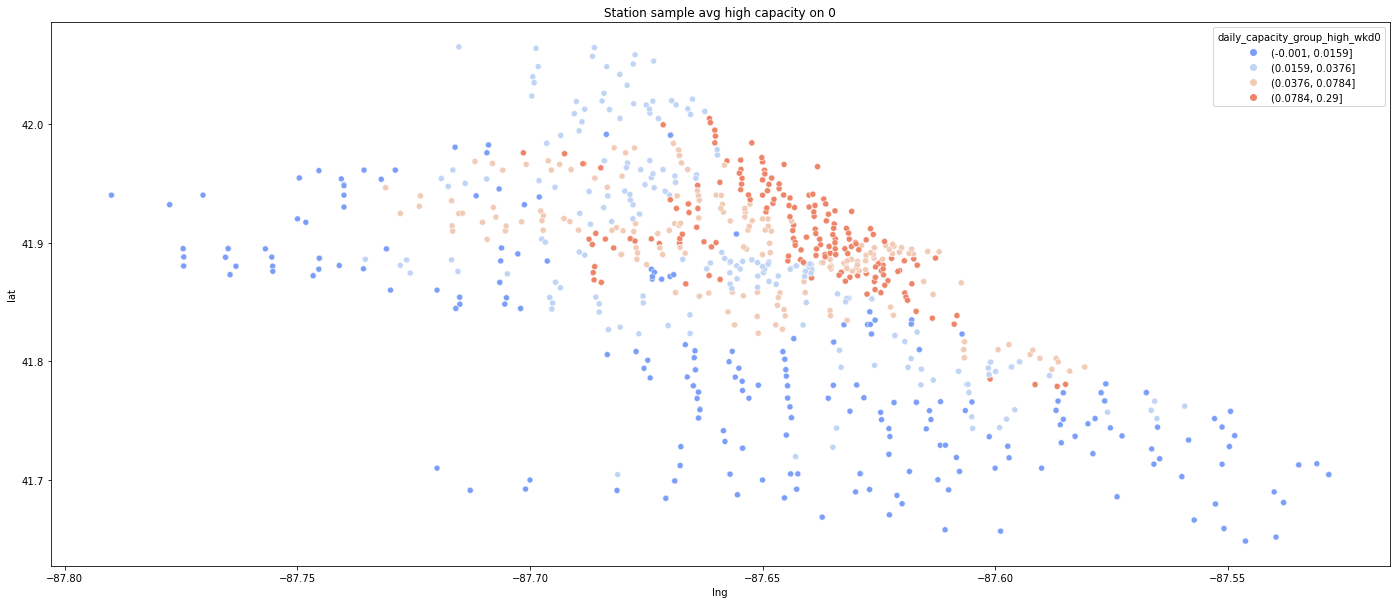

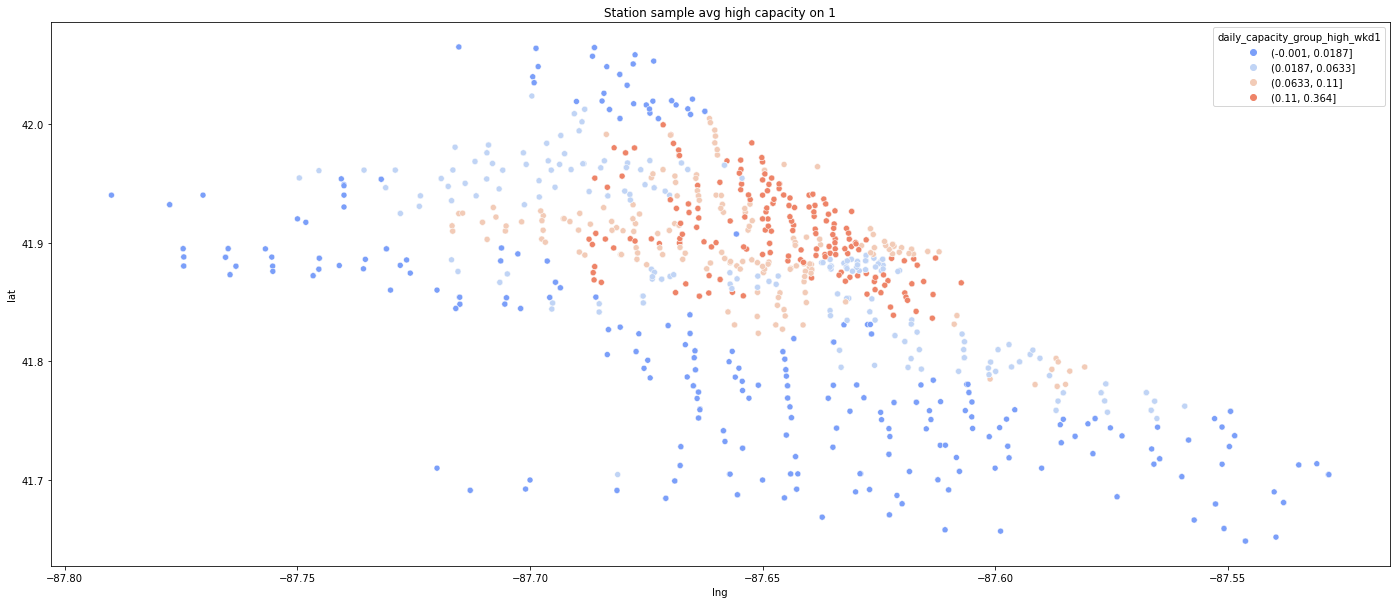

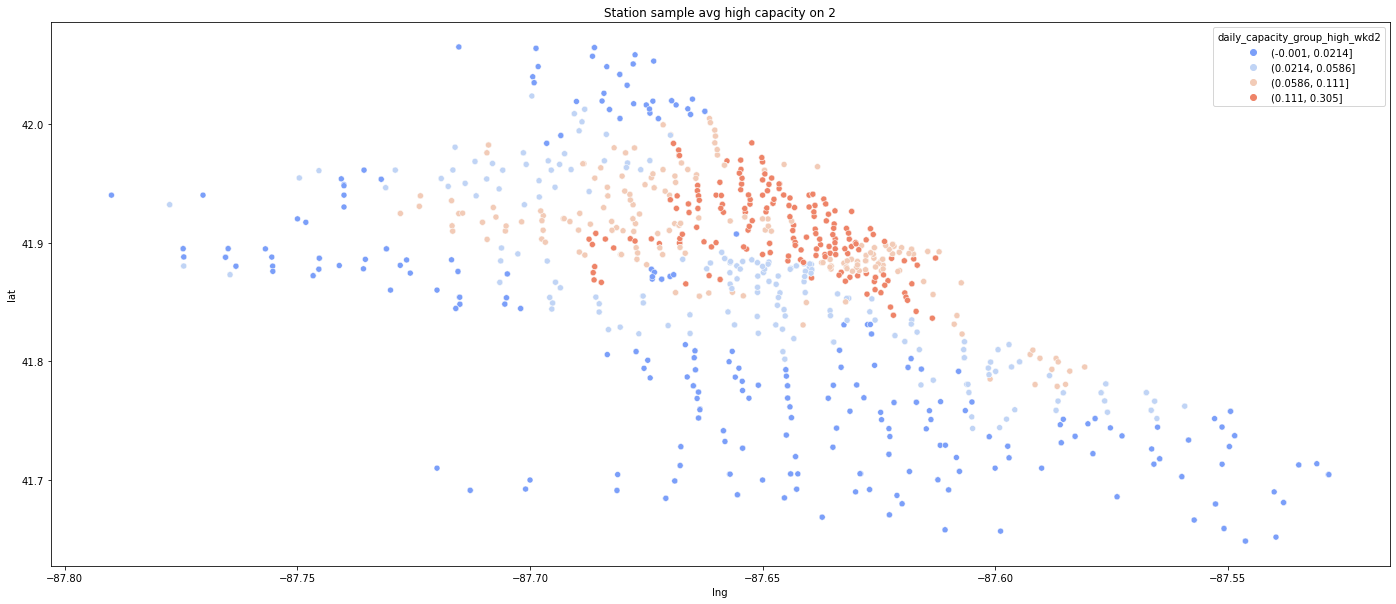

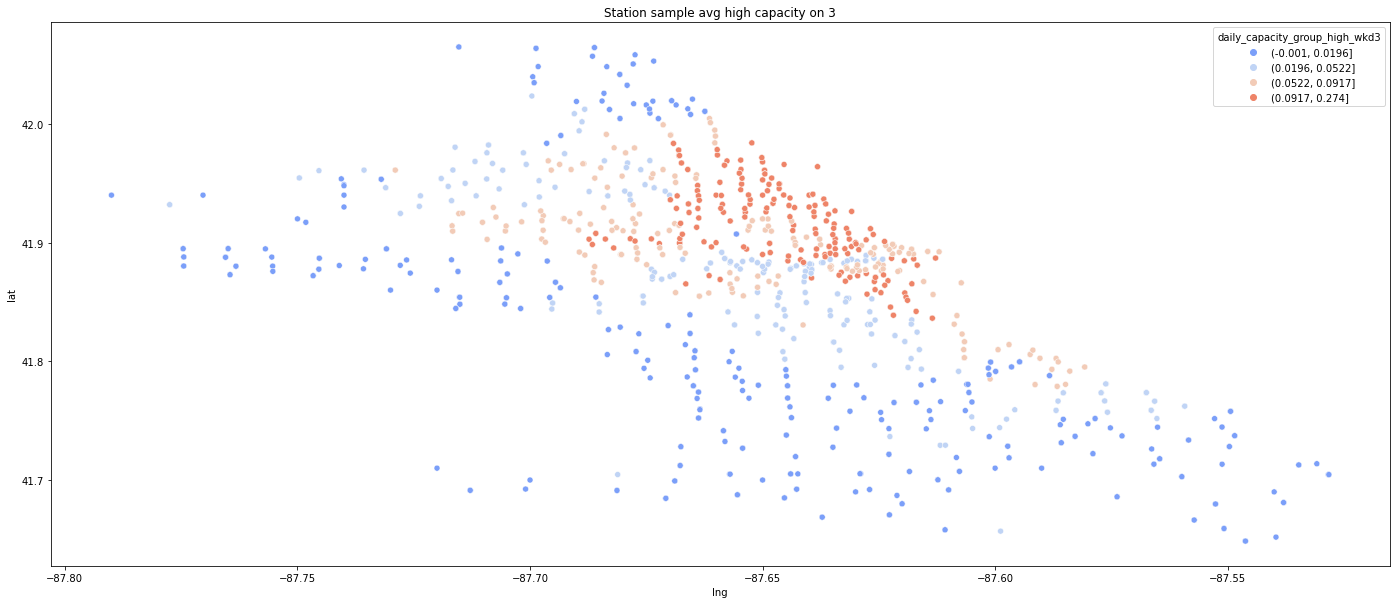

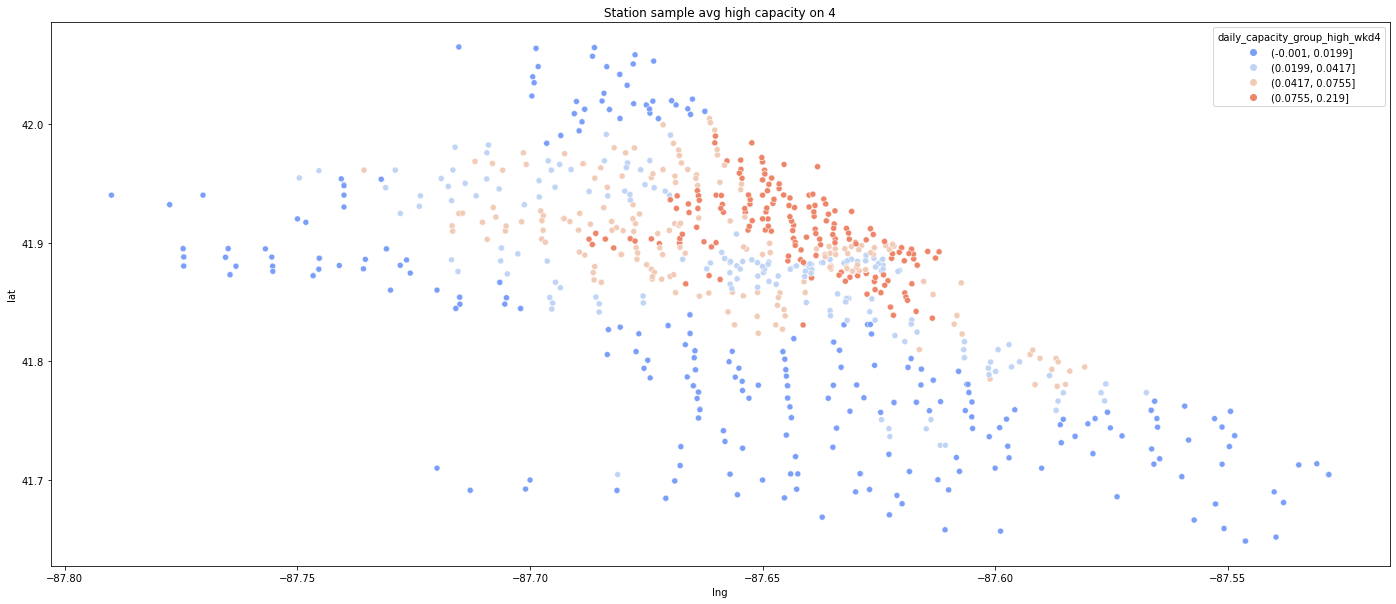

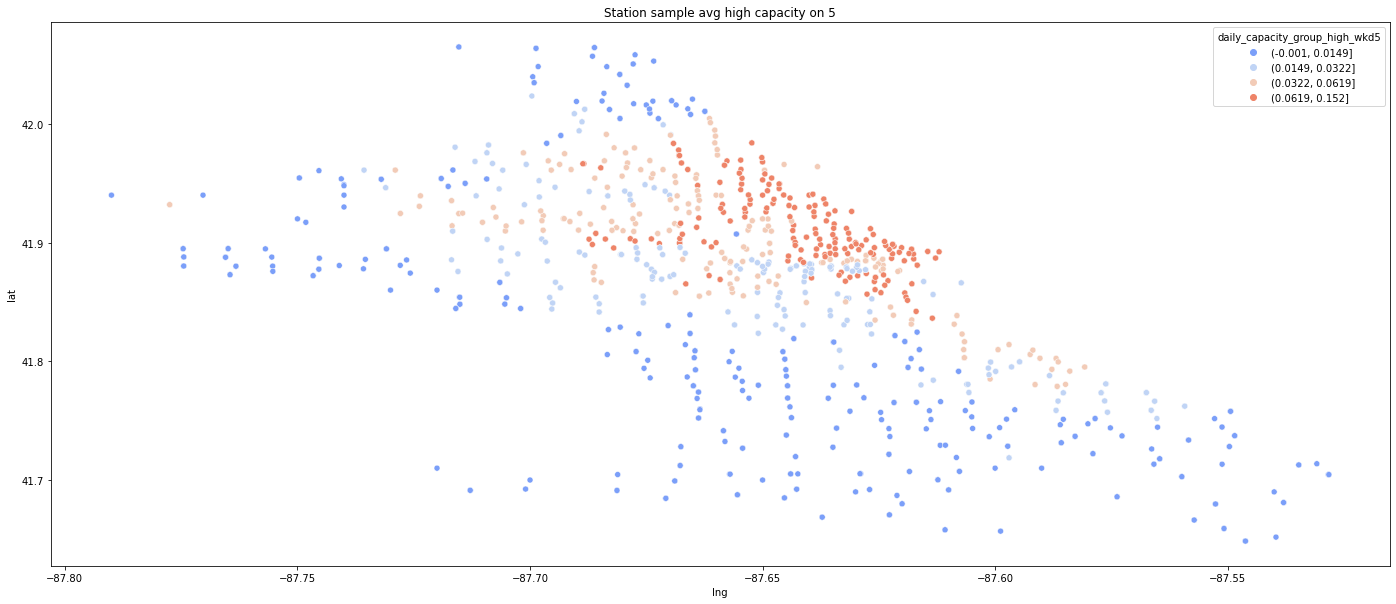

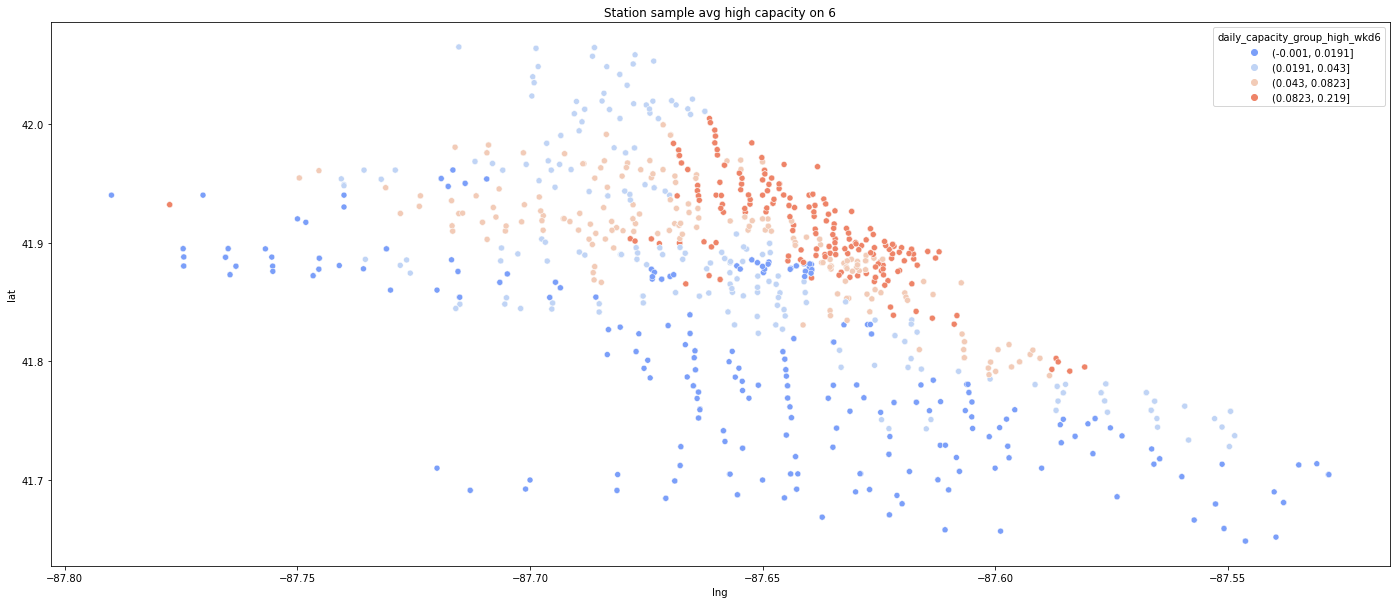

In [126]:
Capacity_Viz('high')